**Purpose of this notebook is to try out Facebook's Prophet, which could be a nice alternative to time series forecasting using the more utilized R packages. This way we are leveraging python's neat data wrangling capabilities.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet

//anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('avocado.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
data.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [4]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [18]:
# let us sort by date
data = data.sort_values('Date').reset_index(drop=True)
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
1,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
2,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
3,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
4,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
18245,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18246,2018-03-25,1.33,57606.42,2002.40,5548.18,82.68,49973.16,49957.61,15.55,0.00,organic,2018,BaltimoreWashington
18247,2018-03-25,1.66,31275.39,1746.29,8110.67,0.00,21418.43,1712.10,19700.47,5.86,organic,2018,Portland


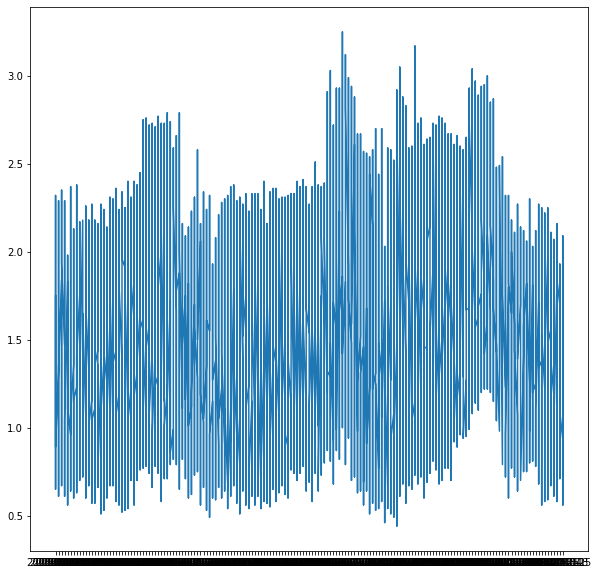

In [7]:
# plot data and average price
plt.figure(figsize=(10,10))
plt.plot(data['Date'], data['AveragePrice'])

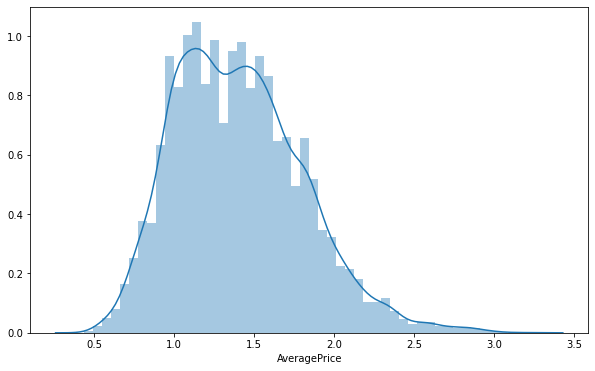

In [8]:
# plt distribution of the averaeg price
plt.figure(figsize=(10,6))
# plt.hist(data['AveragePrice'])
sns.distplot(data['AveragePrice'])

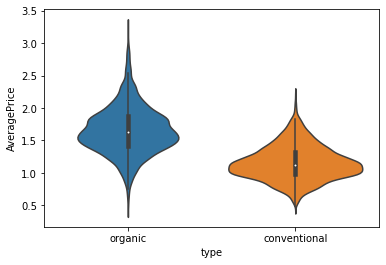

In [9]:
# plot a violin plot of the average price vs. 
sns.violinplot(y='AveragePrice', x='type', data=data)

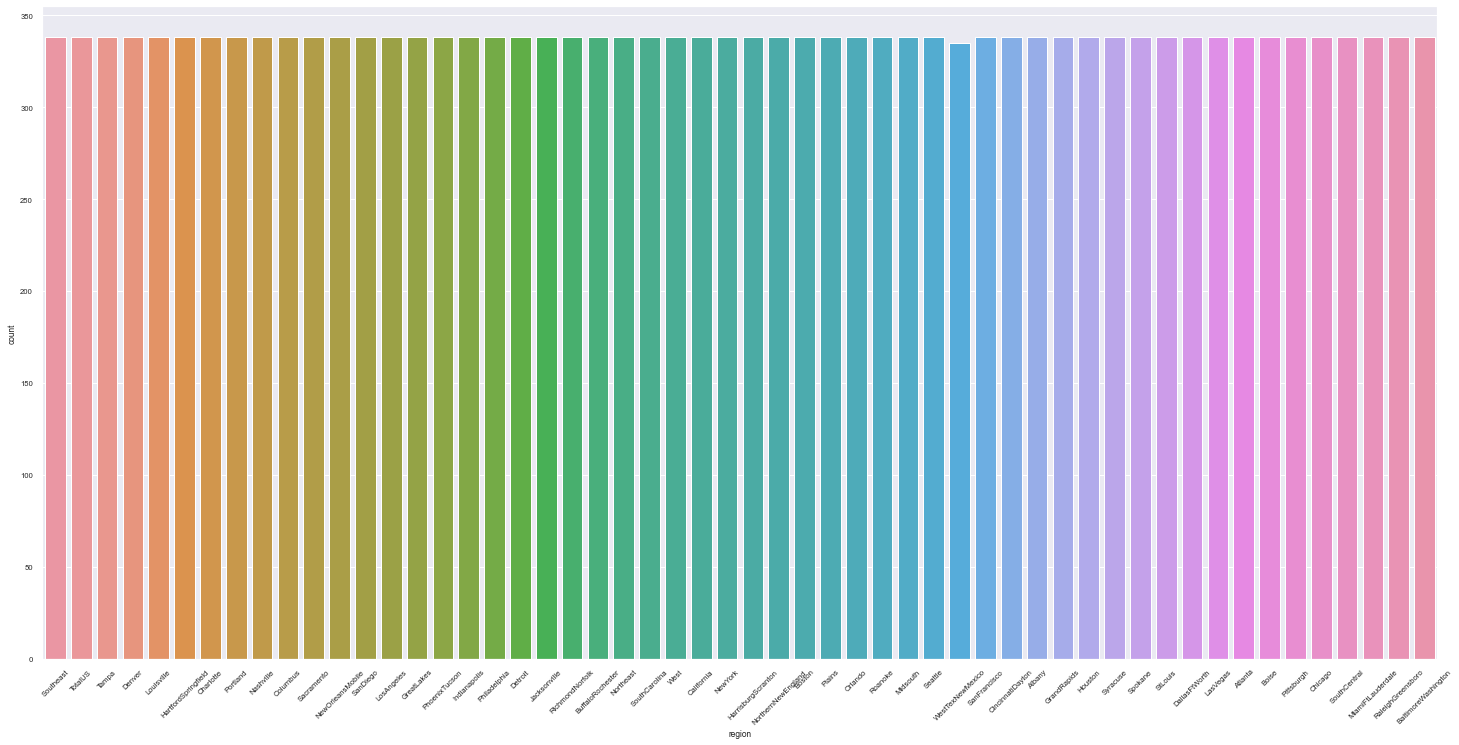

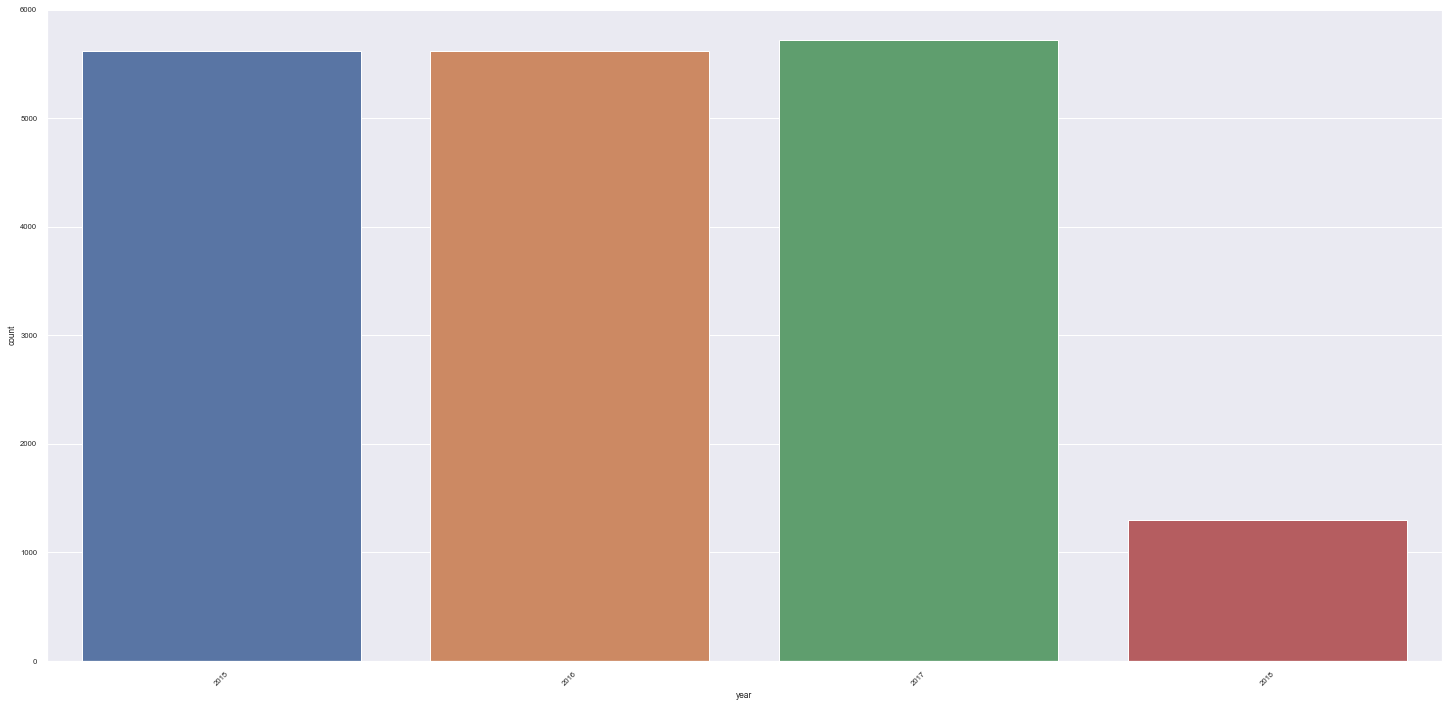

In [16]:
# bar chart to indicate the count according to region
sns.set(font_scale=0.7)
plt.figure(figsize=[25, 12])
sns.countplot(x='region', data=data)
plt.xticks(rotation=45)
plt.show()

# bar chart to indicate the count in every year
sns.set(font_scale=0.7)
plt.figure(figsize=[25, 12])
sns.countplot(x='year', data=data)
plt.xticks(rotation=45)
plt.show()


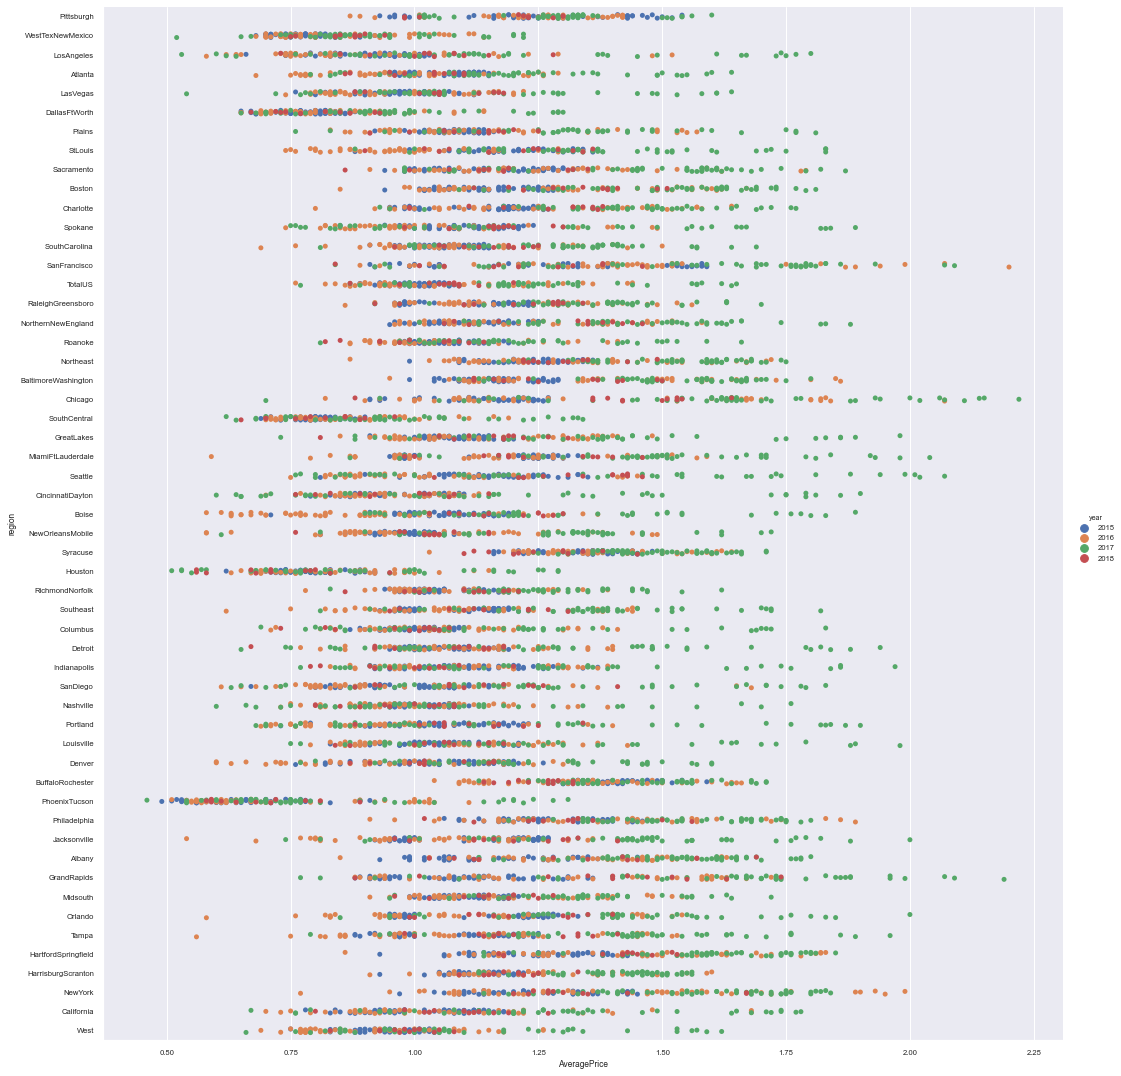

In [11]:
# plot the avocado prices vs. regions for conventional avocados
conventional = sns.catplot('AveragePrice', 'region', data=data[data['type']=='conventional'],
                          hue = 'year', height=15)

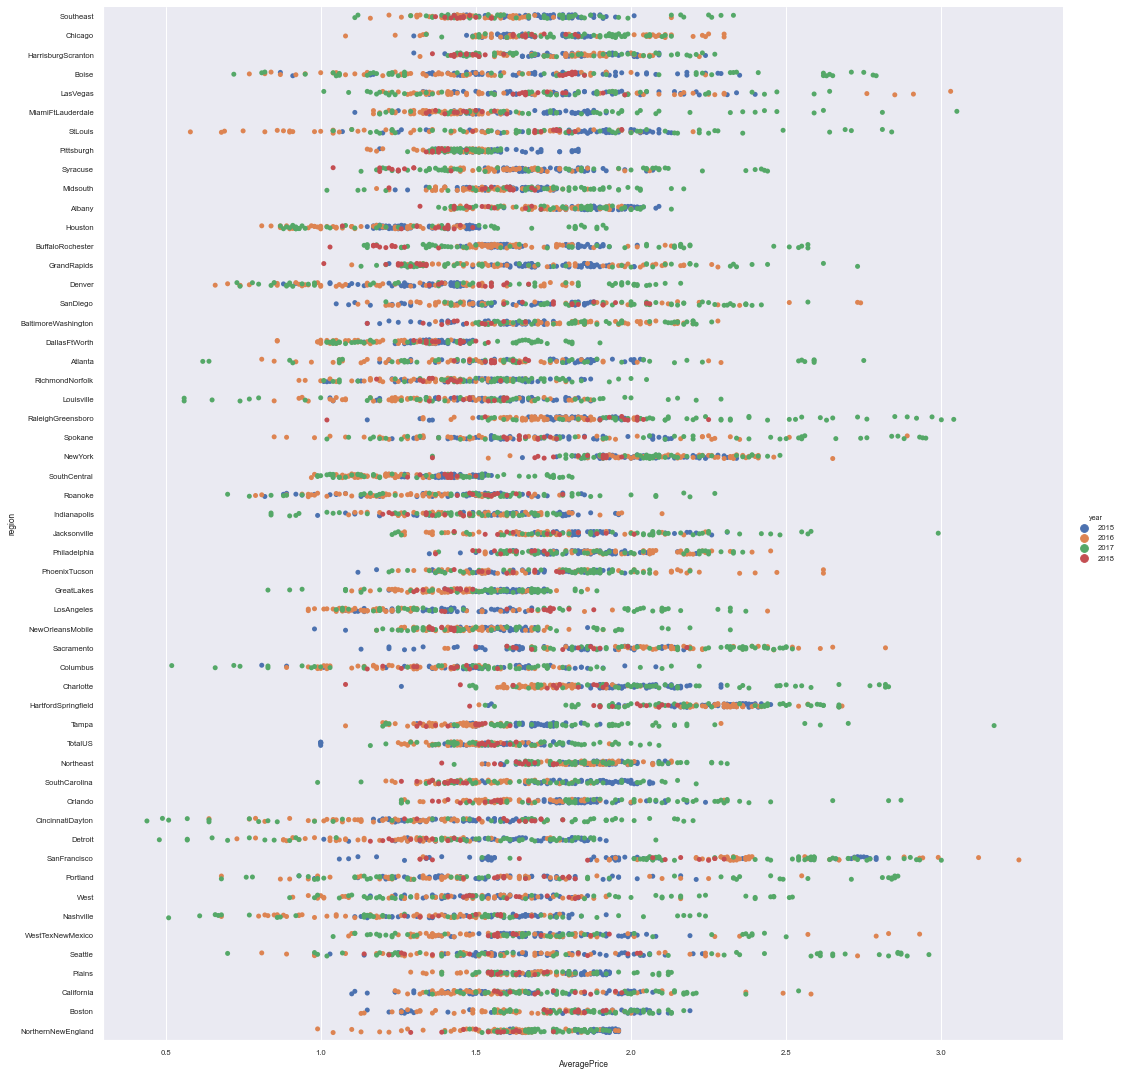

In [12]:
# plot the avocado prices vs. regions for organic avocados
conventional = sns.catplot('AveragePrice', 'region', data=data[data['type']=='organic'],
                          hue = 'year', height=15)

In [29]:
# data needed for FB prophet
prophet_data = data[['Date', 'AveragePrice']]
# need Date to be labeled as ds and AveragePrice as y
prophet_data.columns = ['ds', 'y']
prophet_data

,ds,y
0,2015-01-04,1.75
1,2015-01-04,1.49
2,2015-01-04,1.68
3,2015-01-04,1.52
4,2015-01-04,1.64
...,...,...
18244,2018-03-25,1.36
18245,2018-03-25,0.70
18246,2018-03-25,1.33
18247,2018-03-25,1.66


Some points according to [Facebook](https://research.fb.com/blog/2017/02/prophet-forecasting-at-scale/):

1. Prophet implements an additive regression model with four elements
    - A piecewise linear, Prophet automatically picks up change points in the data and identifies any change in trends.
    - A yearly seasonal component modeled using Fourier Series.
    - A weekly seaosnal component.
    - A holiday list that can be manually provided.


2. Additive Regression model takes the form:

$$Y=\beta_0 + \sum_{j=1}^{p}f_j(X_j)+\epsilon$$

3. The functions $f_j(x_j)$ are unknown smoothing functions fit from the data

